In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

# Ensure output folders exist
output_dirs = {
    "reduced_levels": "outputs/reduced_levels",
    "averaging": "outputs/averaging",
    "rotation": "outputs/rotation",
    "block_averaging": "outputs/block_averaging"
}

for folder in output_dirs.values():
    os.makedirs(folder, exist_ok=True)

# Load image
image_path = 'image.jpg'  # Replace with your image file
img_color = cv2.imread(image_path)
img_gray = cv2.cvtColor(img_color, cv2.COLOR_BGR2GRAY)


## Reduce Intensity Levels

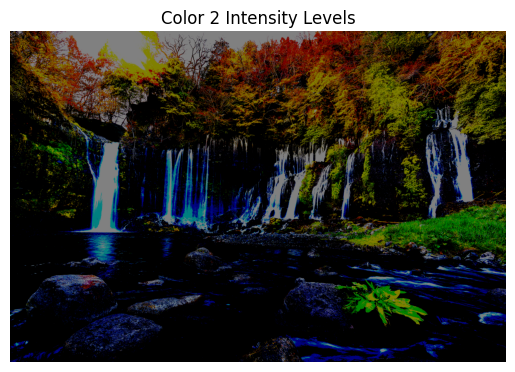

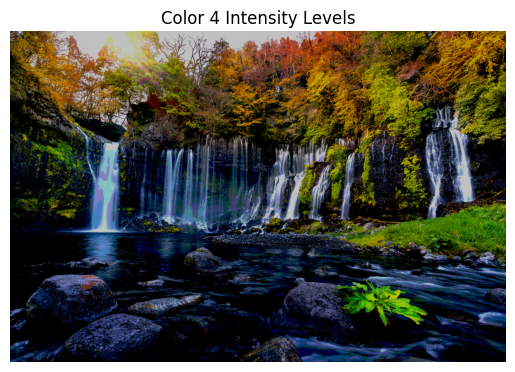

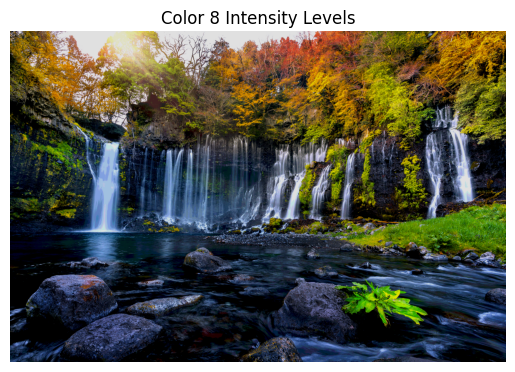

In [11]:
def reduce_intensity_levels_color(img, levels):
    step = 256 // levels
    reduced = (img // step) * step
    filename = f"outputs/reduced_levels/reduced_color_{levels}_levels.png"
    cv2.imwrite(filename, reduced)
    plt.imshow(cv2.cvtColor(reduced, cv2.COLOR_BGR2RGB))
    plt.title(f'Color {levels} Intensity Levels')
    plt.axis('off')
    plt.show()

# Example
for level in [2, 4, 8]:
    reduce_intensity_levels_color(img_color, level)


## Spatial Averaging

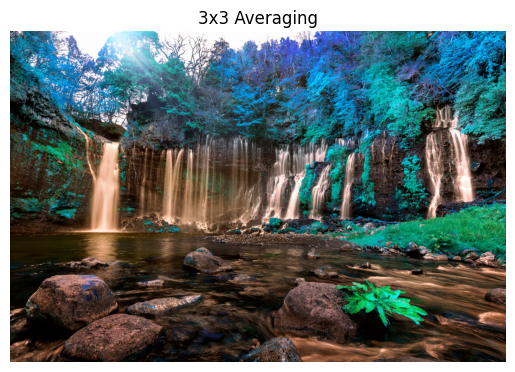

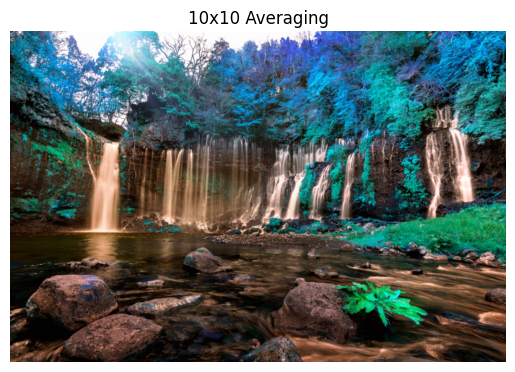

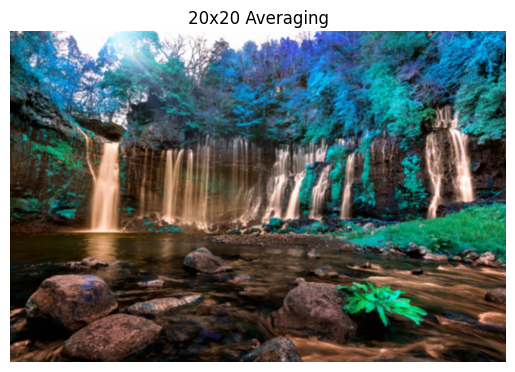

In [5]:
def average_filtering(img, kernel_size):
    blurred = cv2.blur(img, (kernel_size, kernel_size))
    filename = f"outputs/averaging/average_{kernel_size}x{kernel_size}.png"
    cv2.imwrite(filename, blurred)
    plt.imshow(blurred, cmap='gray')
    plt.title(f'{kernel_size}x{kernel_size} Averaging')
    plt.axis('off')
    plt.show()

# Apply for 3x3, 10x10, 20x20
for k in [3, 10, 20]:
    average_filtering(img_color, k)


## Rotate Image by 45° and 90°

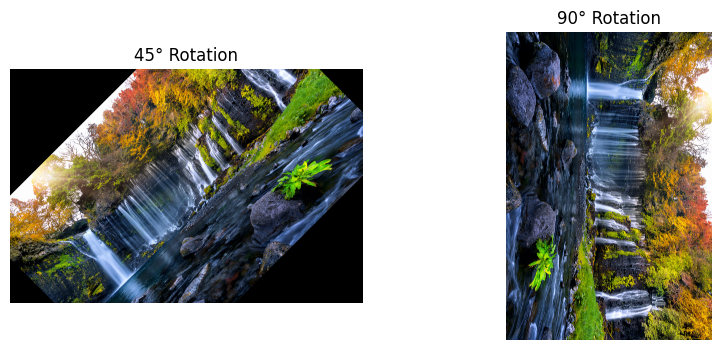

In [6]:
def rotate_image(img):
    h, w = img.shape[:2]
    
    # Rotate 45 degrees
    M_45 = cv2.getRotationMatrix2D((w // 2, h // 2), 45, 1)
    rotated_45 = cv2.warpAffine(img, M_45, (w, h))
    cv2.imwrite("outputs/rotation/rotated_45.png", rotated_45)
    
    # Rotate 90 degrees
    rotated_90 = cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE)
    cv2.imwrite("outputs/rotation/rotated_90.png", rotated_90)

    # Display
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(rotated_45, cv2.COLOR_BGR2RGB))
    plt.title("45° Rotation")
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(rotated_90, cv2.COLOR_BGR2RGB))
    plt.title("90° Rotation")
    plt.axis('off')
    plt.show()

rotate_image(img_color)


## Block Averaging (Reduce Spatial Resolution)

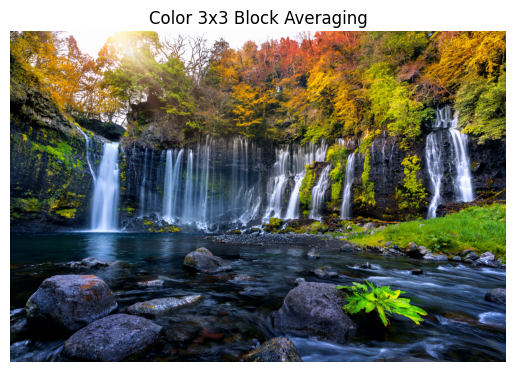

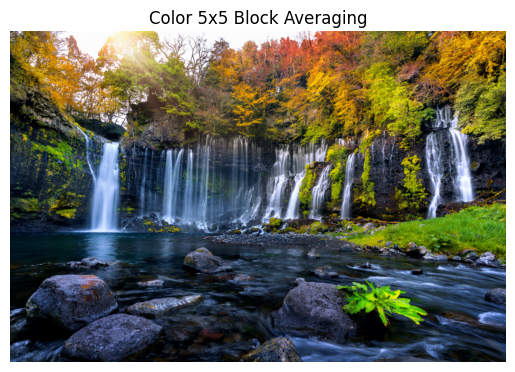

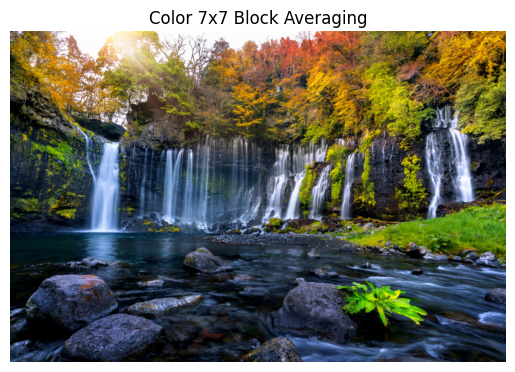

In [ ]:
def block_average_color(img, block_size):
    h, w, c = img.shape
    output = img.copy()

    for i in range(0, h - block_size + 1, block_size):
        for j in range(0, w - block_size + 1, block_size):
            block = img[i:i + block_size, j:j + block_size]
            avg_color = np.mean(block.reshape(-1, 3), axis=0).astype(np.uint8)
            output[i:i + block_size, j:j + block_size] = avg_color

    filename = f"outputs/block_averaging/block_color_{block_size}x{block_size}.png"
    cv2.imwrite(filename, output)
    plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))
    plt.title(f'Color {block_size}x{block_size} Block Averaging')
    plt.axis('off')
    plt.show()
# Example
for b in [3, 5, 7]:
    block_average_color(img_color, b)
